# PERKENALAN

**Nama : Muhamad Fikri Mumtaz**

**Batch: HCK-004**

# LINK TO TABLEAU

Main Dashboard: https://public.tableau.com/views/h8dsft_Milestone1_Muhamad_Fikri_Mumtaz/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Analytical Dashboard: https://public.tableau.com/views/h8dsft_Milestone1_Muhamad_Fikri_Mumtaz_Analytical_Dashboard/Dashboard2?:language=en-US&:display_count=n&:origin=viz_share_link

# SMART PROBLEM

**Background Problem:**

Indonesia Merupakan Negeri Beriklim Tropis sebagai negara beriklim tropis, letak Indonesia sejajar dengan garis khatulistiwa. Hal tersebut menyebabkan Indonesia rentan akan badai, angin topan, dan siklon tropis.

Selain rawan badai, angin topan dan siklon tropis, Indonesia juga memiliki curah hujan yang cukup tinggi mencapai 1000 hingga 4000 per tahunnya. Dengan intensitasnya yang tinggi, memicu timbulnya bencana banjir dan tanah longsor. 

Pada kasus berikut merupakan rentang kejadian banjir di Indonesia yang diakibatkan oleh beberapa penyebab pada rentang tahun 1985 - 2014.

# PROBLEM STATEMENT

1.  Apa penyebab terjadinya bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

2.  Berapa jumlah kejadian tingkat keparahan(*Severity*) bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

3.  Berapa jumlah rata-rata kematian akibat bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

4.  Berapa jumlah rata-rata orang yang mengungsi akibat dari bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

5.  Berapa jumlah total luas area yang terdampak akibat dari bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

6.  Berapa jumlah rata-rata Magnitude bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

7.  Kapan rata-rata durasi kejadian bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

8.  Bagaimana hubungan antara Magnitude bencana banjir dengan durasi hari bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

9.  Bagaimana hubungan antara tingkat Magnitude dengan Jumlah Kematian bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

# INSERT MODULE

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t
from numpy import cov
from scipy.stats import pearsonr

# DATA LOADING

In [412]:
# Masukkan data Kebencanaan skala global
df = pd.read_csv('Flood_Data_Modified.csv',sep=';')
df.head()

,Register_ID,Country,Validation,Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity,Affected sq km,Magnitude,Longitude of Centroid X,Latitude of Centroid Y,M>6,Total annual floods M>6,M>4,Total annual floods M>4,Date Began,Total floods M>6,Total floods M>4
0,4214.0,Columbia,News,01/11/2014,14/12/2014,44.0,44.0,0.0,Heavy Rain,1.0,406010.0,7.25,-75.54,4.59,1.0,98.0,1.0,199.0,01/11/2014,1110.0,3682.0
1,4213.0,USA,News,11/12/2014,14/12/2014,4.0,3.0,0.0,Torrential Rain,1.0,50236.0,5.30,-123.10,39.80,0.0,97.0,1.0,198.0,11/12/2014,1109.0,3681.0
2,4212.0,Brazil,News,10/12/2014,14/12/2014,5.0,0.0,0.0,Torrrential Rain,1.0,199807.0,6.00,-49.21,-24.85,0.0,97.0,1.0,197.0,10/12/2014,1109.0,3680.0
3,4211.0,Bulgaria,News,04/12/2014,14/12/2014,11.0,40.0,1000.0,Heavy Rain,1.5,147617.0,6.39,27.71,41.46,1.0,97.0,1.0,196.0,04/12/2014,1109.0,3679.0
4,4210.0,Palestine,News,26/11/2014,05/12/2014,10.0,0.0,300.0,Torrential Rain,1.5,2862.0,4.63,34.45,31.34,0.0,96.0,1.0,195.0,26/11/2014,1108.0,3678.0


In [4]:
pd.set_option("display.max.columns", None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Register_ID              4213 non-null   float64
 1   Country                  4207 non-null   object 
 2   Validation               4213 non-null   object 
 3   Began                    4207 non-null   object 
 4   Ended                    4207 non-null   object 
 5   Duration in Days         4207 non-null   float64
 6   Dead                     4207 non-null   float64
 7   Displaced                4207 non-null   float64
 8   Main cause               4207 non-null   object 
 9   Severity                 4207 non-null   float64
 10  Affected sq km           4207 non-null   float64
 11  Magnitude                4208 non-null   float64
 12  Longitude of Centroid X  4207 non-null   float64
 13  Latitude of Centroid Y   4207 non-null   float64
 14  M>6                     

# CLEANING DATA

In [413]:
# Menghapus Data Missing Value
df.dropna(inplace=True)
df.head()

,Register_ID,Country,Validation,Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity,Affected sq km,Magnitude,Longitude of Centroid X,Latitude of Centroid Y,M>6,Total annual floods M>6,M>4,Total annual floods M>4,Date Began,Total floods M>6,Total floods M>4
0,4214.0,Columbia,News,01/11/2014,14/12/2014,44.0,44.0,0.0,Heavy Rain,1.0,406010.0,7.25,-75.54,4.59,1.0,98.0,1.0,199.0,01/11/2014,1110.0,3682.0
1,4213.0,USA,News,11/12/2014,14/12/2014,4.0,3.0,0.0,Torrential Rain,1.0,50236.0,5.30,-123.10,39.80,0.0,97.0,1.0,198.0,11/12/2014,1109.0,3681.0
2,4212.0,Brazil,News,10/12/2014,14/12/2014,5.0,0.0,0.0,Torrrential Rain,1.0,199807.0,6.00,-49.21,-24.85,0.0,97.0,1.0,197.0,10/12/2014,1109.0,3680.0
3,4211.0,Bulgaria,News,04/12/2014,14/12/2014,11.0,40.0,1000.0,Heavy Rain,1.5,147617.0,6.39,27.71,41.46,1.0,97.0,1.0,196.0,04/12/2014,1109.0,3679.0
4,4210.0,Palestine,News,26/11/2014,05/12/2014,10.0,0.0,300.0,Torrential Rain,1.5,2862.0,4.63,34.45,31.34,0.0,96.0,1.0,195.0,26/11/2014,1108.0,3678.0


In [414]:
# Dari Data Global Pilih Hanya Negara Indonesia
indonesia = df[df["Country"] == 'Indonesia']

In [415]:
# Ubah Tipe Kolom Dibawah Ini Menjadi Tipe Datetime
indonesia['Began'] = pd.to_datetime(indonesia['Began'])
indonesia['Ended'] = pd.to_datetime(indonesia['Ended'])
indonesia['Date Began'] = pd.to_datetime(indonesia['Date Began'])

C:\Users\User\AppData\Local\Temp\ipykernel_13528\3901295210.py:2: UserWarning: Parsing '14/11/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indonesia['Began'] = pd.to_datetime(indonesia['Began'])
C:\Users\User\AppData\Local\Temp\ipykernel_13528\3901295210.py:2: UserWarning: Parsing '29/12/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indonesia['Began'] = pd.to_datetime(indonesia['Began'])
C:\Users\User\AppData\Local\Temp\ipykernel_13528\3901295210.py:2: UserWarning: Parsing '20/02/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indonesia['Began'] = pd.to_datetime(indonesia['Began'])
C:\Users\User\AppData\Local\Temp\ipykernel_13528\3901295210.py:2: UserWarning: Parsing '16/02/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  indonesia['Began'] = pd.to_d

In [9]:
indonesia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 10 to 4210
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Register_ID              175 non-null    float64       
 1   Country                  175 non-null    object        
 2   Validation               175 non-null    object        
 3   Began                    175 non-null    datetime64[ns]
 4   Ended                    175 non-null    datetime64[ns]
 5   Duration in Days         175 non-null    float64       
 6   Dead                     175 non-null    float64       
 7   Displaced                175 non-null    float64       
 8   Main cause               175 non-null    object        
 9   Severity                 175 non-null    float64       
 10  Affected sq km           175 non-null    float64       
 11  Magnitude                175 non-null    float64       
 12  Longitude of Centroid X  175 non-n

In [445]:
# Urutkan Dataframe Berdasarkan Kronologi Waktunya
df1 = indonesia.sort_values('Began',ascending=True).reset_index(drop=True)
df1

,Register_ID,Country,Validation,Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity,Affected sq km,Magnitude,Longitude of Centroid X,Latitude of Centroid Y,M>6,Total annual floods M>6,M>4,Total annual floods M>4,Date Began,Total floods M>6,Total floods M>4
0,8.0,Indonesia,News,1985-02-19,1985-02-23,5.0,10.0,2000.0,Heavy rain,1.0,77091.0,5.59,108.14,-7.04,0.0,1.0,1.0,8.0,1985-02-19,1.0,8.0
1,4.0,Indonesia,News,1985-04-02,1985-02-18,15.0,21.0,300.0,Torrential rain,1.0,16542.0,5.39,124.61,1.01,0.0,1.0,1.0,4.0,1985-04-02,1.0,4.0
2,112.0,Indonesia,News,1986-10-27,1986-03-11,8.0,93.0,31000.0,Heavy rain,2.0,79415.0,6.10,106.01,-3.71,1.0,13.0,1.0,37.0,1986-10-27,24.0,101.0
3,272.0,Indonesia,News,1988-12-17,1988-12-19,3.0,40.0,0.0,Torrential rain,1.0,7438.0,4.35,109.96,-6.93,0.0,25.0,1.0,88.0,1988-12-17,59.0,235.0
4,278.0,Indonesia,News,1989-01-17,1989-01-27,11.0,35.0,137000.0,Tropical cyclone,1.0,841.0,3.97,104.64,-4.21,0.0,0.0,0.0,1.0,1989-01-17,59.0,236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,4096.0,Indonesia,News,2013-07-10,2013-10-14,8.0,0.0,16000.0,Torrential Rain,1.5,31024.0,5.57,99.68,2.95,0.0,39.0,1.0,84.0,2013-07-10,1051.0,3567.0
171,4112.0,Indonesia,News,2013-12-29,2014-04-01,7.0,0.0,4500.0,Heavy Rain,1.0,22525.0,5.20,97.29,4.48,0.0,48.0,1.0,100.0,2013-12-29,1060.0,3583.0
172,4121.0,Indonesia,News,2014-08-01,2014-07-02,31.0,23.0,20000.0,Heavy Rain,1.5,35769.0,6.22,107.71,-6.63,1.0,54.0,1.0,108.0,2014-08-01,1066.0,3591.0
173,4173.0,Indonesia,News,2014-11-08,2014-08-19,9.0,2.0,600.0,Torrential Rain,1.0,65177.0,5.77,107.83,-7.00,0.0,79.0,1.0,158.0,2014-11-08,1091.0,3641.0


In [417]:
# Ubah Data dibawah ini menjadi huruf kapital pada awal huruf kata
caps = [i.title() for i in indonesia['Main cause']]
df1['Main cause'] = caps

In [418]:
# Ubah Jenis Bencana aga mempermudah mengkategorisasi
df1['Main cause'] = df1['Main cause'].str.replace('Monsoon Rains', 'Monsoonal Rain')
df1['Main cause'] = df1['Main cause'].str.replace('Dam/Levy Break Or Release', 'Dam Break Heavy Rain')

In [13]:
df1['Main cause'].unique()

array(['Heavy Rain', 'Torrential Rain', 'Monsoonal Rain',
       'Dam Break Heavy Rain', 'Brief Torrential Rain',
       'Tropical Cyclone'], dtype=object)

In [446]:
# Buat kolom baru untuk kolom tahun yang diambil dari kolom Began
df1['Year'] = pd.DatetimeIndex(df1['Began']).year

In [447]:
df1

,Register_ID,Country,Validation,Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity,Affected sq km,Magnitude,Longitude of Centroid X,Latitude of Centroid Y,M>6,Total annual floods M>6,M>4,Total annual floods M>4,Date Began,Total floods M>6,Total floods M>4,Year
0,8.0,Indonesia,News,1985-02-19,1985-02-23,5.0,10.0,2000.0,Heavy rain,1.0,77091.0,5.59,108.14,-7.04,0.0,1.0,1.0,8.0,1985-02-19,1.0,8.0,1985
1,4.0,Indonesia,News,1985-04-02,1985-02-18,15.0,21.0,300.0,Torrential rain,1.0,16542.0,5.39,124.61,1.01,0.0,1.0,1.0,4.0,1985-04-02,1.0,4.0,1985
2,112.0,Indonesia,News,1986-10-27,1986-03-11,8.0,93.0,31000.0,Heavy rain,2.0,79415.0,6.10,106.01,-3.71,1.0,13.0,1.0,37.0,1986-10-27,24.0,101.0,1986
3,272.0,Indonesia,News,1988-12-17,1988-12-19,3.0,40.0,0.0,Torrential rain,1.0,7438.0,4.35,109.96,-6.93,0.0,25.0,1.0,88.0,1988-12-17,59.0,235.0,1988
4,278.0,Indonesia,News,1989-01-17,1989-01-27,11.0,35.0,137000.0,Tropical cyclone,1.0,841.0,3.97,104.64,-4.21,0.0,0.0,0.0,1.0,1989-01-17,59.0,236.0,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,4096.0,Indonesia,News,2013-07-10,2013-10-14,8.0,0.0,16000.0,Torrential Rain,1.5,31024.0,5.57,99.68,2.95,0.0,39.0,1.0,84.0,2013-07-10,1051.0,3567.0,2013
171,4112.0,Indonesia,News,2013-12-29,2014-04-01,7.0,0.0,4500.0,Heavy Rain,1.0,22525.0,5.20,97.29,4.48,0.0,48.0,1.0,100.0,2013-12-29,1060.0,3583.0,2013
172,4121.0,Indonesia,News,2014-08-01,2014-07-02,31.0,23.0,20000.0,Heavy Rain,1.5,35769.0,6.22,107.71,-6.63,1.0,54.0,1.0,108.0,2014-08-01,1066.0,3591.0,2014
173,4173.0,Indonesia,News,2014-11-08,2014-08-19,9.0,2.0,600.0,Torrential Rain,1.0,65177.0,5.77,107.83,-7.00,0.0,79.0,1.0,158.0,2014-11-08,1091.0,3641.0,2014


# DATA ANALYSIS AND  EXPLORATION

1.  Apa penyebab terjadinya bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [431]:
#Melihatkan Jumlah Kejadian
df1['Main cause'].value_counts()

Heavy Rain               134
Torrential Rain           21
Monsoonal Rain            10
Brief Torrential Rain      6
Dam Break Heavy Rain       2
Tropical Cyclone           2
Name: Main cause, dtype: int64

Text(4.95, 4, '2')

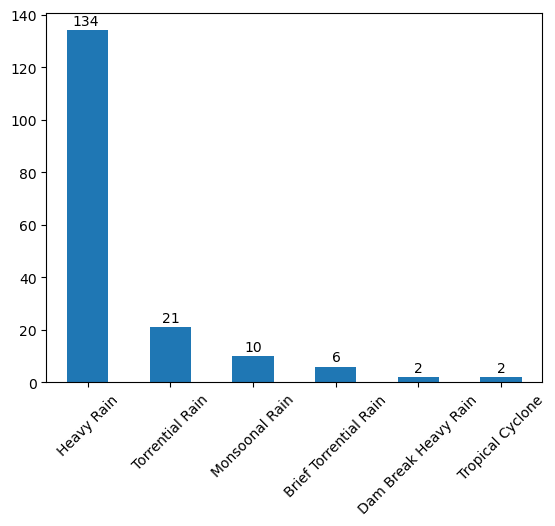

In [420]:
#Plotting Jumlah Kejadian
df1['Main cause'].value_counts().plot(kind='bar',rot = 45)
plt.text(x=-0.18,y=136,s=134) 
plt.text(x=0.9,y=23,s=21)
plt.text(x=1.9,y=12,s=10) 
plt.text(x=2.95,y=8,s=6)
plt.text(x=3.95,y=4,s=2) 
plt.text(x=4.95,y=4,s=2)

Berdasarkan data diatas terdapat 6 penyebab terjadinya bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014 yaitu;
1.  Heavy Rain dengan 134 kejadian;
2.  Torrential Rain dengan 21 kejadian;
3.  Monsoonal Rain dengan 10 kejadian;
4.  Dam Break Heavy Rain dengan 6 kejadian;
5.  Brief Torrential Rain dengan 2 kejadian;
6.  Tropical Cyclone dengan 2 kejadian

2.  Berapa jumlah kejadian tingkat keparahan(*Severity*) bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [451]:
#Melihatkan Jumlah Kejadian
df1['Severity'].value_counts()

1.0    151
2.0     12
1.5     12
Name: Severity, dtype: int64

Text(1.95, 14, '12')

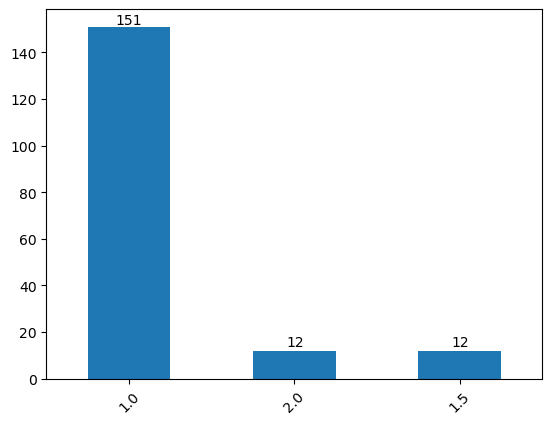

In [452]:
#Plotting Jumlah Kejadian
df1['Severity'].value_counts().plot(kind='bar',rot = 45)
plt.text(x=-0.08,y=152,s=151) 
plt.text(x=0.95,y=14,s=12)
plt.text(x=1.95,y=14,s=12) 

Berdasarkan plot data diatas terdapat 3 tingkat severity bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014 yaitu:
1.  Tingkat Severity Level 1 dengan 151 kejadian;
2.  Tingkat Severity Level 2 dengan 12 kejadian;
3.  Tingkat Severity Level 1.5 dengan 12 kejadian

***Catatan:***

**Kelas 1**: kejadian banjir besar: kerusakan signifikan pada bangunan atau pertanian; kematian; dan/atau interval yang dilaporkan selama 1-2 dekade sejak kejadian serupa terakhir.

**Kelas 1.5**: kejadian sangat besar: lebih dari 20 tahun tetapi interval pengulangan kurang dari 100 tahun, dan atau interval pengulangan lokal pada 10-20 tahun.

**Kelas 2**: Kejadian ekstrim: dengan perkiraan interval pengulangan lebih dari 100 tahun.

3.  Berapa jumlah rata-rata kematian akibat bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [453]:
# Mengambil Rata-Rata Kematian berdasarkan Tahun
df1.groupby([df1["Year"]])[["Dead"]].mean().mean()

Dead    29.369828
dtype: float64

In [454]:
# Mengambil Jumlah Rata-Rata Kematian berdasarkan Tahun
df1.groupby([df1["Year"]])[["Dead"]].sum().mean()

Dead    131.275862
dtype: float64

In [465]:
# Mengambil Rata-Rata Kematian berdasarkan Per Tahun
a = df1.groupby([df1["Year"]])[["Dead"]].mean()
a.head()

,Dead
Year,
1985,15.5
1986,93.0
1988,40.0
1989,11.5
1990,54.0


In [459]:
# Mengambil Jumlah Kematian berdasarkan Per Tahun 
df1.groupby([df1["Year"]])[["Dead"]].sum().sort_values('Dead',ascending=False).head()

,Dead
Year,
2006,721.0
2007,436.0
2003,380.0
2002,293.0
2000,252.0


In [462]:
# Mengambil Jumlah Kematian berdasarkan Per Tahun
c = df1.groupby([df1["Year"]])[["Dead"]].sum()
c

,Dead
Year,
1985,31.0
1986,93.0
1988,40.0
1989,46.0
1990,216.0
1991,76.0
1992,70.0
1993,54.0
1994,71.0


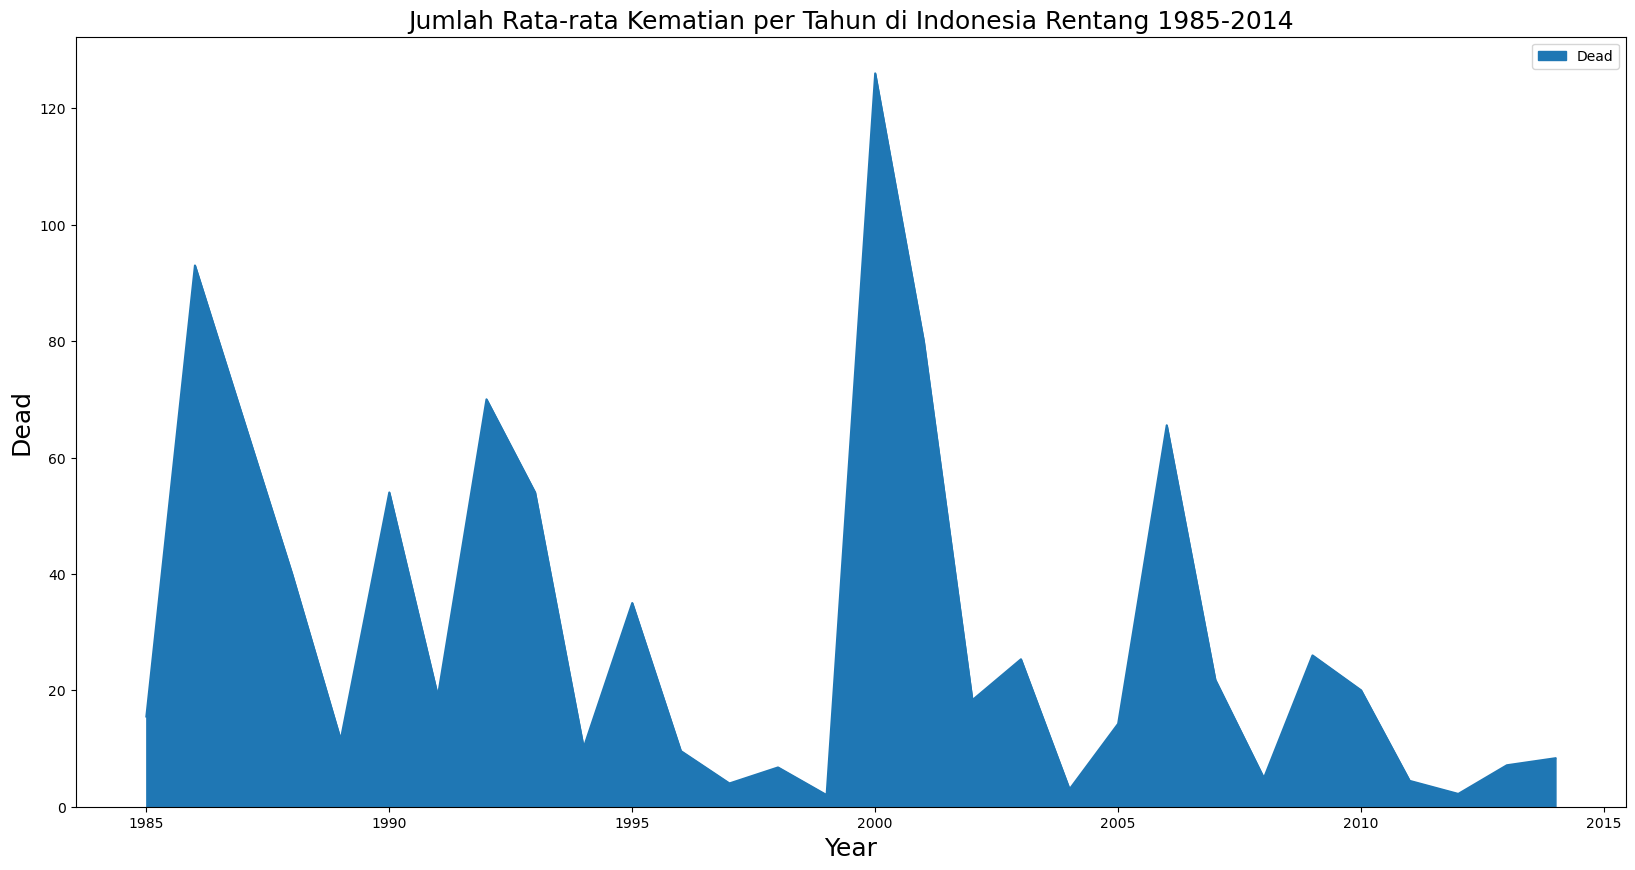

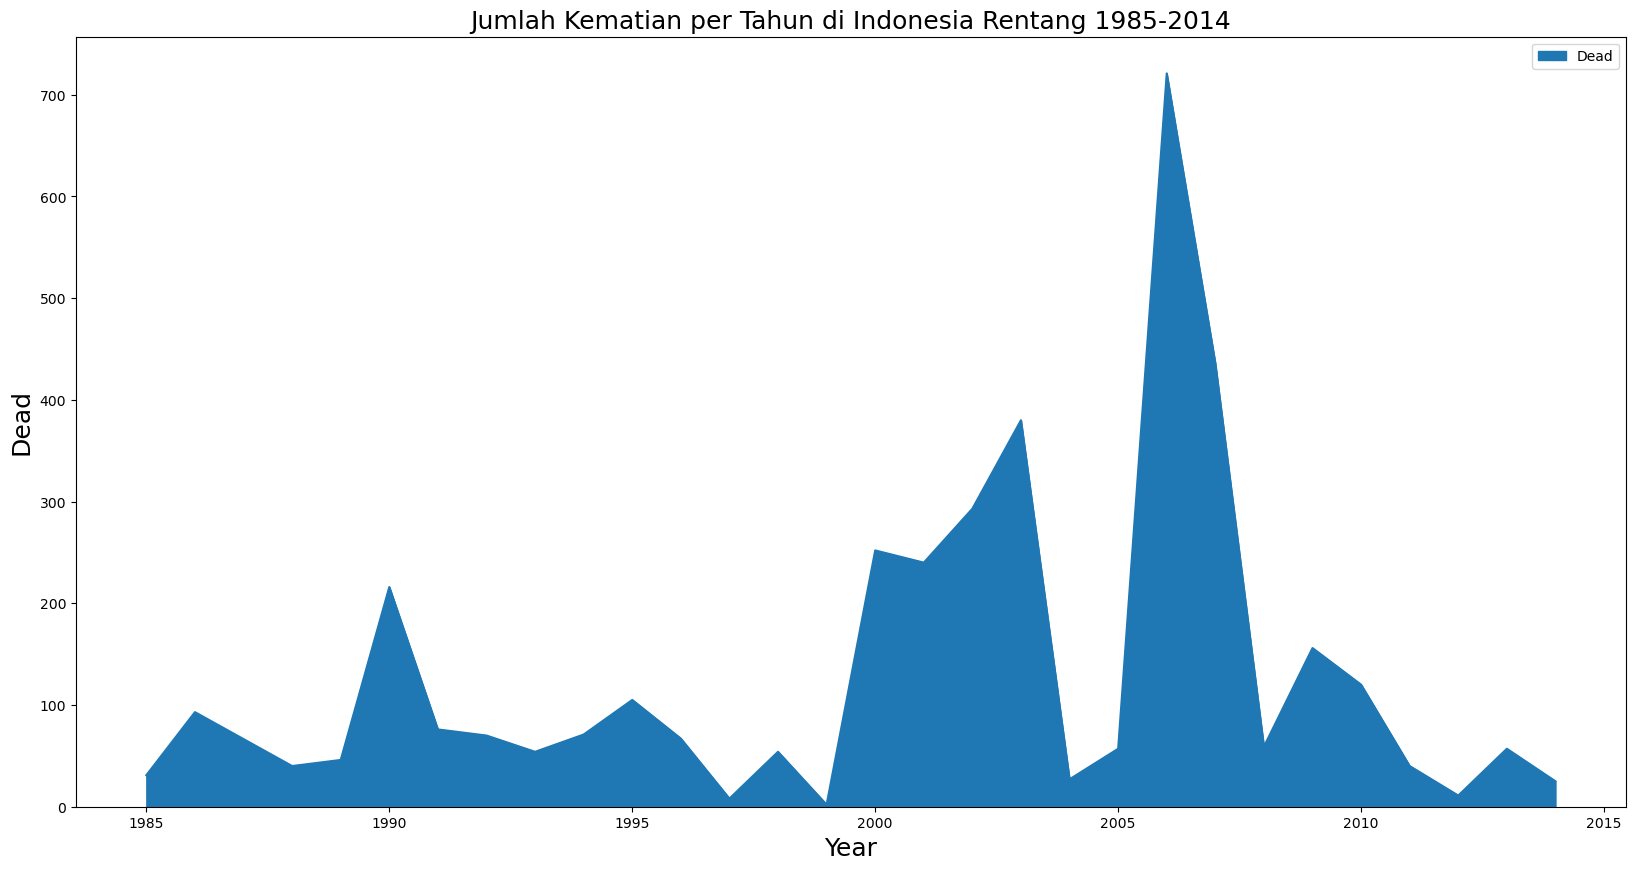

In [466]:
#Plotting Jumlah Rata-rata Kematian 
a.plot.area(stacked=True, figsize=(20,10))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Dead', fontsize = 18)
plt.title('Jumlah Rata-rata Kematian per Tahun di Indonesia Rentang 1985-2014',fontsize = 18)
c.plot.area(stacked=True, figsize=(20,10))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Dead', fontsize = 18)
plt.title('Jumlah Kematian per Tahun di Indonesia Rentang 1985-2014',fontsize = 18)
plt.show()

Berdasarkan data diatas bahwa dari semua kejadian bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014 terdapat rata - rata 29 kematian setiap tahunnya, lalu terdapat 131 jumlah kematian setiap tahunnya dengan jumlah kematian tertinggi ditahun 2006 dengan jumlah kematian sebanyak 721 orang.

4.  Berapa jumlah rata-rata orang yang mengungsi akibat dari bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [467]:
# Mengambil Jumlah Orang Mengungsi berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Displaced"]].sum().mean()

Displaced    141546.241379
dtype: float64

In [468]:
# Mengambil Jumlah Maksimum Orang Mengungsi berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Displaced"]].sum().max()

Displaced    699432.0
dtype: float64

In [472]:
# Mengambil Jumlah Orang Mengungsi berdasarkan Per Tahun
d = df1.groupby([df1["Year"]])[["Displaced"]].sum()
d.head()

,Displaced
Year,
1985,2300.0
1986,31000.0
1988,0.0
1989,152000.0
1990,45460.0


Text(0.5, 1.0, 'Jumlah Rata-Rata Orang Mengungsi per Tahun di Indonesia Rentang 1985-2014')

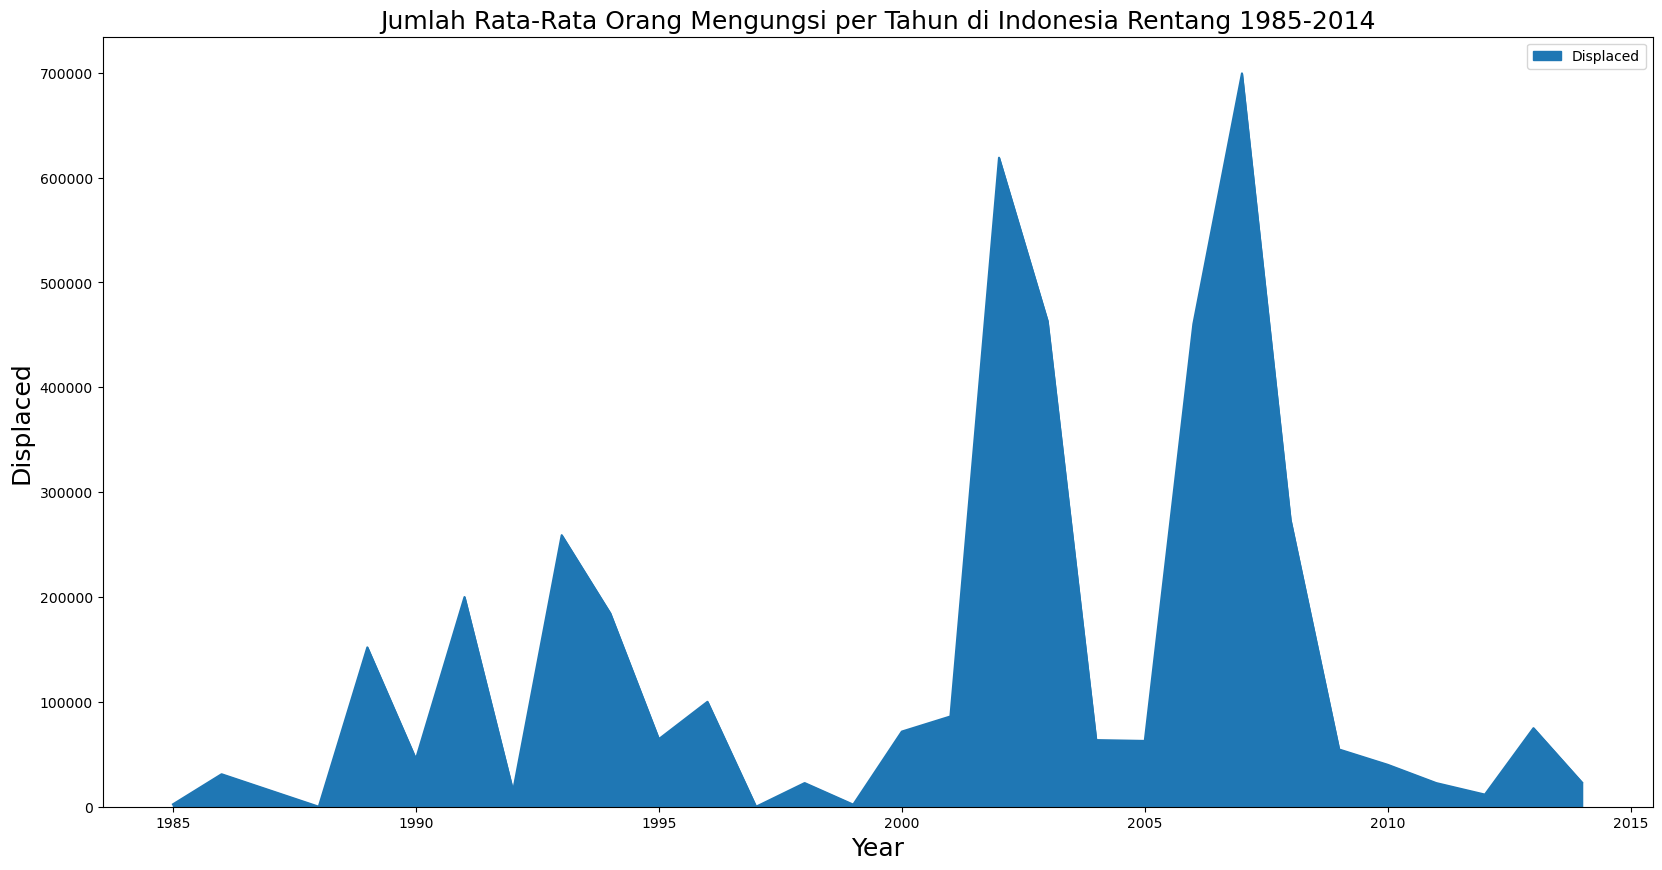

In [471]:
#Plotting Jumlah Rata-rata Orang Menungsi 
d.plot.area(stacked=True, figsize=(20,10))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Displaced', fontsize = 18)
plt.title('Jumlah Rata-Rata Orang Mengungsi per Tahun di Indonesia Rentang 1985-2014',fontsize = 18)

Berdasarkan data diatas bahwa dari semua kejadian bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014 terdapat rata - rata 141.546 orang mengungsi setiap tahunnya dengan orang mengungsi terbanyak adalah sebanyak 699.432 orang pada tahun 2006.

5.  Berapa jumlah total luas area yang terdampak akibat dari bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [474]:
# Mengambil Jumlah Maksimum Luas Area Terdampak berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Affected sq km"]].sum().max()

Affected sq km    1330210.0
dtype: float64

In [475]:
# Mengambil Jumlah Rata-Rata Luas Area Terdampak berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Affected sq km"]].sum().mean()

Affected sq km    212042.758621
dtype: float64

In [476]:
# Mengambil Jumlah Luas Area Terdampak berdasarkan Per Tahun
e = df1.groupby([df1["Year"]])[["Affected sq km"]].sum()
e

,Affected sq km
Year,
1985,93633.0
1986,79415.0
1988,7438.0
1989,122041.0
1990,58775.0
1991,270602.0
1992,98560.0
1993,19197.0
1994,185450.0


Text(0.5, 1.0, 'Jumlah Rata-Rata Luas Tanah Terdampak per Tahun di Indonesia Rentang 1985-2014')

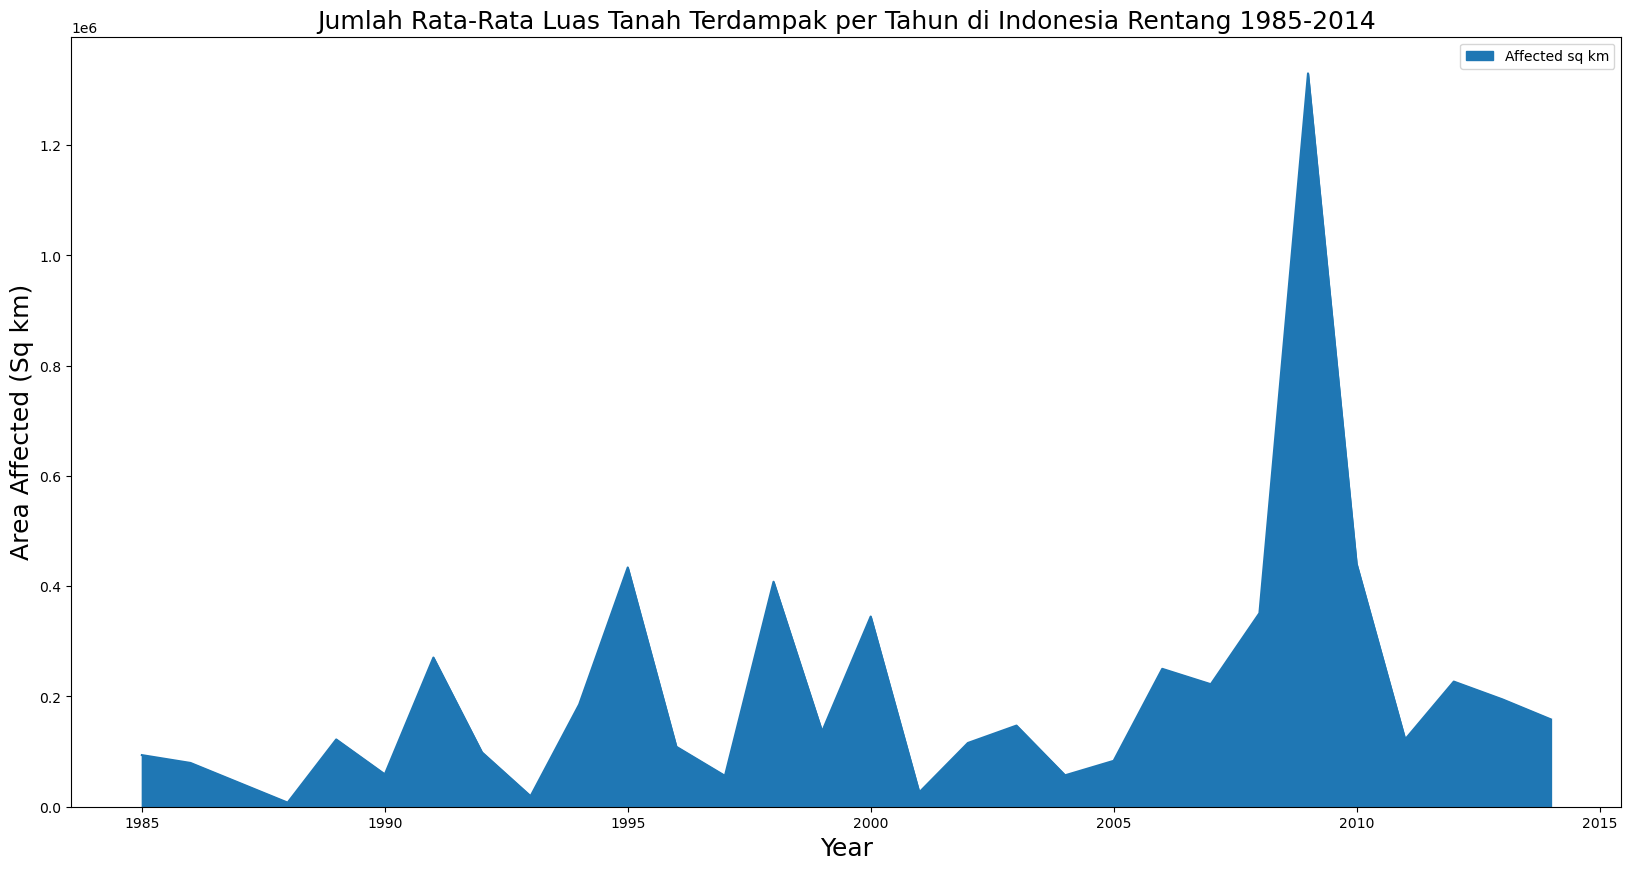

In [477]:
# Plotting Jumlah Rata-Rata Luas Area Terdampak berdasarkan Per Tahun
e.plot.area(stacked=True, figsize=(20,10))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Area Affected (Sq km)', fontsize = 18)
plt.title('Jumlah Rata-Rata Luas Tanah Terdampak per Tahun di Indonesia Rentang 1985-2014',fontsize = 18)

Berdasarkan data diatas bahwa dari bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014 terdapat rata - rata 212.042,75 luas tanah yang terdampak setiap tahunnya dengan luas tanah terdampak terbesar adalah seluas 1.330.210 km2 pada tahun 2009.

6.  Berapa jumlah rata-rata Magnitude bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [478]:
# Mengambil Jumlah Rata-Rata Magnitude berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Magnitude"]].mean().mean()

Magnitude    5.009203
dtype: float64

In [479]:
# Mengambil Jumlah Maksimum Rata-Rata Magnitude berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Magnitude"]].mean().max()

Magnitude    6.64
dtype: float64

In [480]:
# Mengambil Rata-Rata Magnitude berdasarkan Per Tahun
f = df1.groupby([df1["Year"]])[["Magnitude"]].mean()
f.head()

,Magnitude
Year,
1985,5.4900
1986,6.1000
1988,4.3500
1989,4.7025
1990,4.7950


Text(0.5, 1.0, 'Jumlah Rata-Rata Magnitude Banjir per Tahun di Indonesia Rentang 1985-2014')

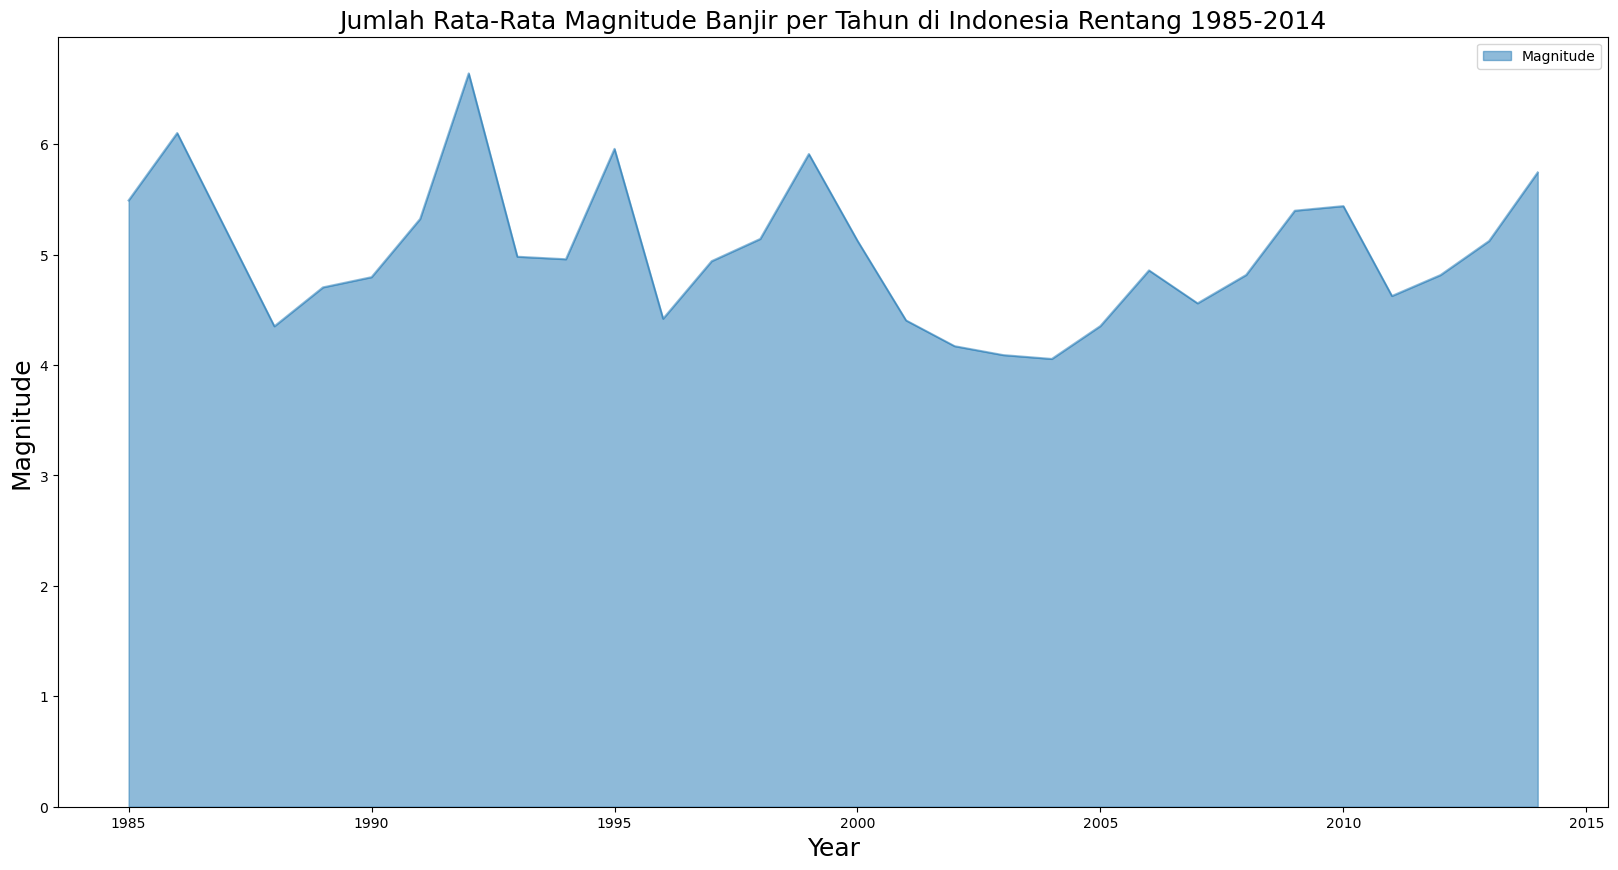

In [481]:
# Plotting Jumlah Rata-Rata Magnitude berdasarkan Per Tahun
f.plot.area(stacked=False, figsize=(20,10))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Magnitude', fontsize = 18)
plt.title('Jumlah Rata-Rata Magnitude Banjir per Tahun di Indonesia Rentang 1985-2014',fontsize = 18)

Berdasarkan data diatas bahwa Indonesia mengalami bencana banjir dengan rata-rata magnitude sebesar 5 setiap tahunnya pada rentang tahun 1985-2014 dengan magnitude terbesar adalah 6.64.

*Catatan:*

Nilai Magnitude Banjir adalah ukuran seberapa parah kejadian banjir secara hidrologikal,  “0” adalah nilai terkecil yang dilaporkan (debit di bawah 1,5 tahun interval pengulangan debit; tidak ada banjir). “10” adalah yang terbesar, yang merupakan rekor banjir terbesar.

7.  Kapan rata-rata durasi kejadian bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [482]:
# Mengambil Jumlah Rata-Rata Durasi Hari Banjir berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Duration in Days"]].mean().mean()

Duration in Days    8.440263
dtype: float64

In [483]:
# Mengambil Jumlah Maksimum Rata-Rata Durasi Hari Banjir berdasarkan Per Tahun
df1.groupby([df1["Year"]])[["Duration in Days"]].mean().max()

Duration in Days    44.0
dtype: float64

In [484]:
# Mengambil Rata-Rata Durasi Hari Banjir berdasarkan Per Tahun
g = df1.groupby([df1["Year"]])[["Duration in Days"]].mean()
g.head()

,Duration in Days
Year,
1985,10.0
1986,8.0
1988,3.0
1989,6.5
1990,9.0


Text(0.5, 1.0, 'Jumlah Durasi Banjir (Hari) per Tahun di Indonesia Rentang 1985-2014')

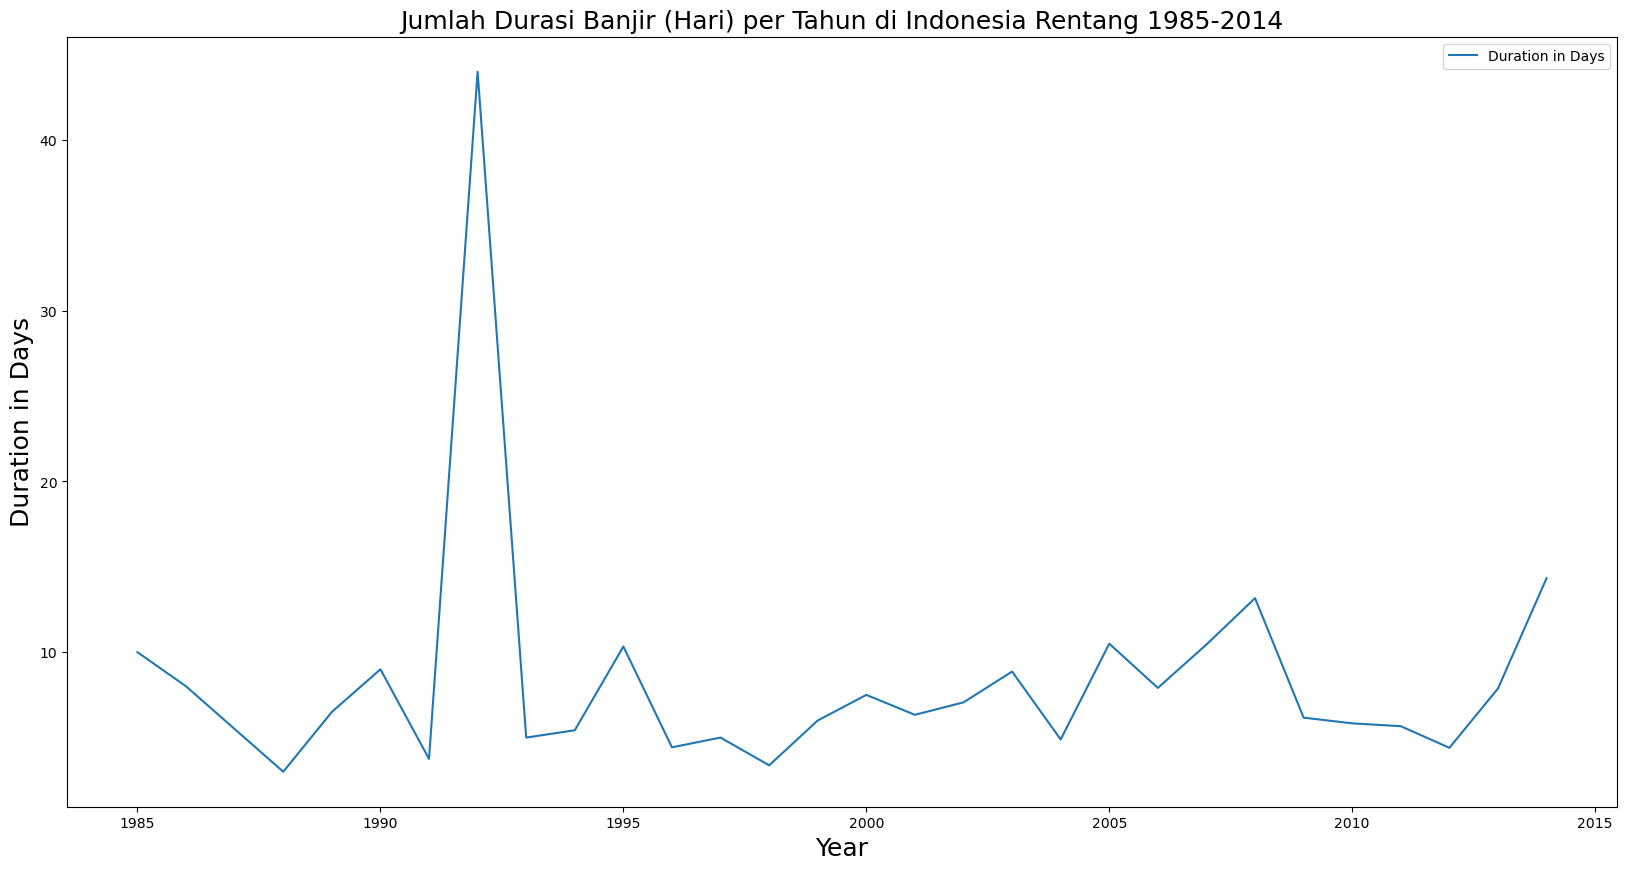

In [485]:
# Plotting Jumlah Rata-Rata Durasi Hari Banjir berdasarkan Per Tahun
g.plot.line(stacked=True, figsize=(20,10))
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Duration in Days', fontsize = 18)
plt.title('Jumlah Durasi Banjir (Hari) per Tahun di Indonesia Rentang 1985-2014',fontsize = 18)

Berdasarkan data diatas bahwa Indonesia mengalami bencana banjir dengan rata-rata durasi selama 8,44 hari setiap tahunnya pada rentang tahun 1985-2014 dengan durasi terlama selama 44 hari pada tahun 1992.

8.  Bagaimana hubungan antara Magnitude bencana banjir dengan durasi hari bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

Text(0.5, 1.0, 'Hubungan Antara Magnitude dengan Duration in Days')

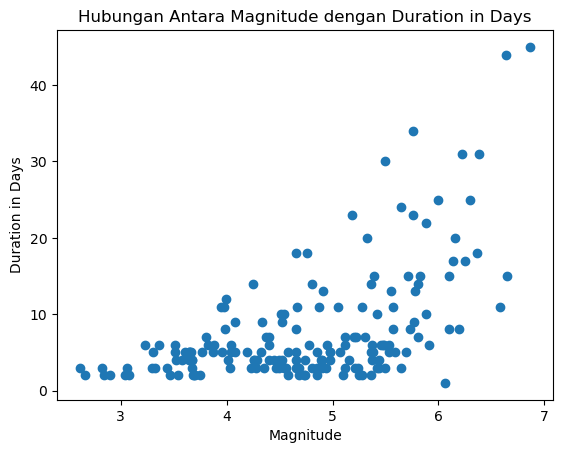

In [487]:
# Plotting Hubungan Antara Magnitude dengan Duration in Days
fig,axes = plt.subplots()
axes.scatter(df1['Magnitude'], df1['Duration in Days'], alpha=1)
axes.set_xlabel('Magnitude')
axes.set_ylabel('Duration in Days')
axes.set_title('Hubungan Antara Magnitude dengan Duration in Days')

In [488]:
# Menghitung Korelasi Pearson antara Magnitude dengan Duration in Days
corr, _ = pearsonr(df1['Magnitude'], df1['Duration in Days'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.551


Berdasarkan uji analisis diatas menggunakan *Pearson Rank* bahwa uji analisis hubungan antara Magnitude dengan Durasi Hari Banjir adalah 0.551 yang berarti **Terdapat korelasi Sedang Antara Hubungan Magnitude dengan Durasi Hari Banjir**

9.  Bagaimana hubungan antara Magnitude dengan Jumlah Kematian bencana banjir di Indonesia pada rentang tahun 1985 hingga tahun 2014?

In [489]:
# Mengambil Rata-Rata Magnitude berdasarkan Jumlah Kematian
df1.groupby([df1["Magnitude"]])[["Dead"]].mean()


,Dead
Magnitude,
2.61,0.0
2.66,1.0
2.82,4.0
2.84,39.0
2.90,0.0
...,...
6.38,9.0
6.58,243.0
6.64,70.0


In [490]:
# Menghitung Korelasi Pearson antara Magnitude dengan Jumlah Kematian
corr, _ = pearsonr(df1['Magnitude'], df1['Dead'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.200


Text(0.5, 1.0, 'Hubungan Antara Magnitude dengan Jumlah Kematian')

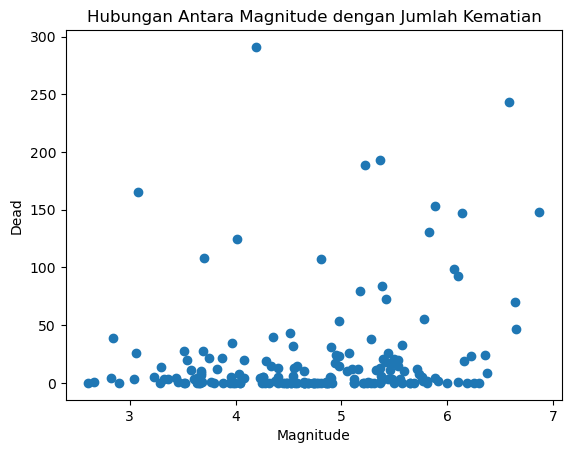

In [492]:
# Plotting Korelasi antara Magnitude dengan Jumlah Kematian
fig,axes = plt.subplots()
axes.scatter(df1['Magnitude'], df1['Dead'], alpha=1)
axes.set_xlabel('Magnitude')
axes.set_ylabel('Dead')
axes.set_title('Hubungan Antara Magnitude dengan Jumlah Kematian')

Berdasarkan uji analisis diatas menggunakan *Pearson Rank* bahwa uji analisis hubungan antara Magnitude dengan Jumlah Kematian adalah 0.200 yang berarti **Terdapat Sedikit Korelasi Antara Hubungan Magnitude dengan Jumlah Kematian**

# KESIMPULAN

Dapat Disimpulkan analisis diatas, yaitu:

- Bencana Banjir di Indonesia pada umumnya disebabkan oleh 6 jenis bencana hidrologi.

- Bencana Banjir di Indonesia tercatat memiliki 3 level severity.

- Bencana banjir di Indonesia tercatat memiliki  rata - rata 29 kematian setiap tahunnya.

- Bencana banjir di Indonesia tercatat memiliki  rata - rata 141.546 orang mengungsi setiap tahunnya.

- Bencana banjir di Indonesia tercatat memiliki  rata - rata 212.042,75 luas tanah yang terdampak setiap tahunnya.

- Bencana banjir di Indonesia tercatat memiliki  rata - rata magnitude sebesar 5 setiap tahunnya.

- Bencana banjir di Indonesia tercatat memiliki  rata-rata durasi hari banjir selama 8,44 hari setiap tahunnya.

- Berdasarkan uji analisis Pearson terdapat korelasi sedang antara hubungan magnitude dengan durasi hari banjir.

- Berdasarkan uji analisis  Pearson terdapat korelasi sedang antara hubungan magnitude dengan tingkat kematian.

# RECOMMENDATION

Indonesia tercatat sebagai negara dengan bencana alam banjir terbanyak ketiga di dunia. Oleh karena itu, banjir di Indonesia sangat sering terjadi dengan banjir tingkat kerusakan yang rendah hingga tinggi. Masyarakat dan Pemerintah harus segera melakukan tindak pencegahan terjadinya korban jiwa akibat dari bencana banjir di Indonesia.

Tindakan Pencegahan tersebut dapat berupa *Early Warning System* seperti aplikasi BMKG atau pembuatan cuaca buatan. Untuk diperkotaan dengan padat penduduk untuk petugas terkait agar dapat mengamankan warga terdampak banjir di wilayah terdampak banjir.

Tindak Lainnya dapat berupa revitalisasi sungai, pelebaran sungai, pembersihan sungai, dan menertibkan hunian ilegal disekitaran sungai.



# OVERALL ANALYSIS

Analisis Keseluruhan dari Analisis Data Diatas adalah:

Bahwa Indonesia sangat sering terjadi bencana banjir dari tingkat kerusakan ringan hingga tinggi yang menelan puluhan korban jiwa setiap tahunnya, membuat ratusan ribu warga mengungsi, dan berdampak kepada ratusan ribu km2 lahan warga dapat berdampak kepada kerugian materiil atau inmateriil.